<center>

# Fractal sets and how to draw them</center>


The main point of this session is to use complex numbers and algorithms to produce digital pictures representing Julia sets. In order to do so, the session will be divided into two parts:

* The first one is needed to understand the mathematical process applied to some initial complex number $z_0$ and which will be iterated all along to obtain the Julia set.


* The last one is more focused on the computing experiment which will be written in python.

> All along this document, you will encounter incomplete sentences with blanks ($\dots$), they are yours to fill in!

## I. Complex sequences
### I.1) A simple case
Let's start by examinating the following complex sequence:   $ \bigg\{
    \begin{array}{ll}
        z_0 \in \mathbb{C}\\
       \forall n \in \mathbb{N},  ~z_{n+1}=z_n^2
    \end{array} $

So we have to choose a complex number $z_0$ and determine whatever happens to $z_n$ as $n$ goes to infinity.

To help you elaborate your conjecture you can use the following python instruction:  <b> square_orbit( $x_0$, $y_0$)</b>.

>Where: $x_0$ is the real part of $z_0$ and $y_0$ is its imaginary part.

This function will plot all the values of the sequence in the complex plane for you, below is an example, you just need to change the numbers to fit which starting point you want to try. You can also change the values by dragging the mouse over $z_0$!

In [1]:
from julia import* #just importing the necessary tools from python

In [9]:
square_orbit( x0 = -0.15, y0 = -0.85)

Figure(axes=[Axis(grid_lines='none', offset={'value': 0.5}, scale=LinearScale(max=1.2, min=-1.2)), Axis(grid_l…

   >So we can observe two cases: 
* Either $\dots\dots\dots\dots\dots$
* Or it remains $\dots\dots\dots\dots\dots$


Let's see if we can explain that, first of all: what happens when a complex number $z$ is squared? Well, it is easier to use the exponential form of $z$ here: $~z=re^{i\theta}~$ so $~z^2=r^2e^{2i\theta}$
<img src= "z2.png" style = 'width: 300px; height: 339' />
The graph below is an example of such an operation from a geometrical point of view.

When a complex number is squared, its modulus is $\dots\dots\dots\dots\dots$ but its argument is $\dots\dots\dots\dots\dots$.

Let's put the argument aside and think a bit more about the modulus:

* If $|z|<1$, $|z|^2 \dots |z|$.

   > Hence if we choose $z_0$ <b>inside the unit circle</b> and we keep squaring the results, the terms of the sequence $\dots\dots\dots\dots\dots$.

* If $|z|=1$, $|z|^2 \dots |z|$.

   > Hence if we choose $z_0$ <b>on the unit circle</b> and we keep squaring the results,  the terms of the sequence $\dots\dots\dots\dots\dots$.

* If $|z|>1$, $|z|^2 \dots |z|$.

  >  Hence if we choose $z_0$ <b>outside the unit circle</b> and we keep squaring the results,  the terms of the sequence $\dots\dots\dots\dots\dots$

In the later case, we will call $z_0$ an <b> escape point </b> because they keep going to infinity while in the two formers it will be called a <b>captive one</b> since they remain bounded.

> The <b> Julia set</b> is defined as the boundary between the sets of escape points and captive ones.

So in our case, the Julia set here is $\dots\dots\dots\dots\dots$.

### I.2) A bit further

 Instead of just squaring the result at each step we are now going to also add a new complex number $c$, which can be interpreted as a vector that can bring back our sequence towards the origin. Here is a geometrical representation of the process:
 
<img src= "z2+c.png" style = 'width: 300px; height: 450px' />
 
 So our complex sequence $(z_n)$ is now degined by:   $ \bigg\{
    \begin{array}{ll}
        z_0 \in \mathbb{C}\\
       \forall n \in \mathbb{N},  ~z_{n+1}=z_n^2+c
    \end{array} $
 
   It is now a lot more complicated to determine whether $z_0$ is an escape point or a captive one while iterating our process, especially since it depends on the chosen value $c$.
 
 We can still have a guess with the python instruction:  <b> plot_orbit( $x_0$, $y_0$,, $a$, $b$ )</b>.
>Where: 
>*  $x_0$ is the real part of $z_0$ and $y_0$ is its imaginary part.
>* $a$ is the real part of $c$ and $b$ is its imaginary part.

So you have to choose $c = a+ ib$ and then try to determine the boundary between the $z_0= x +iy$ that are escape points and the others. 

In [3]:
plot_orbit(x0 = 0.5, y0 = 0.5, a = 0.25, b = 0.3)

Figure(axes=[Axis(grid_lines='none', offset={'value': 0.5}, scale=LinearScale(max=1.2, min=-1.2)), Axis(grid_l…

## II. Computing Julia sets

Even with the plot_orbit function, it remains quite difficult to get a precise idea of the Julia set for a given $c\in\mathbb{C}$.

Let us try another approach, but first we need to undersand how a digital image is displayed.

> The key idea is that when you have a picture on your screen, it is composed of tiny luminous squares called pixels and each pixel is given a color to match the image displayed, whatever it is. So in the end, a digital image is nothing else than a grid of coloured pixels, which in maths is called a matrix.

So, to draw our Julia set we are going to start with an empty image in which each pixel is equivalent to an initial value $z_0$.

Then, we just have to compute the terms of the sequence and according to the final results $z_0$ will be deemed as an escape point or a captive one and the matching pixel will be dyed accordingly. 

To do so we are willing to admit that the following criterion is true:

> <b> Criterion: </b>  If there is a value of $n$ such as $|z_n|$ > 2, $z_0$ is necessarily an escape point.

Note that we can't compute an infinite number of terms, so we have to define a threshold, $n_{max}$, from which we will deem a point captive.

In [7]:
# setup of the window

x_min = -1.5
x_max =  1.5
y_min = -1.5
y_max =  1.5

# size of the output image: 500px*500px 

width = 500

# a function linking the pixel coordinates to the complex ones

def pixel_to_complex(x,y): 
    
    x0 = x_min + x*(x_max-x_min)/(width)  
    y0 = y_max - y*(y_max-y_min)/(width)
    
    return x0,y0
    
# the function creating the image of the fractal set!

def julia(a, b, n_max):
    
    c = complex(a,b)
    
    img = np.zeros((width,width,3),dtype=np.uint8) # define the image as a square matrix

    for x in range(width): # the first loop is going through the columns of the grid

        for y in range(width): # the second loop scans the lines

                k = 0     # k is index of the sequence

                # the complex coordinates of the initial points follows:
                
                x0, y0 = pixel_to_complex(x,y)
                
                z = complex(x0,y0) # here is z_0

                while k <= n_max and abs(z) <= 2 : # abs(z) is the modulus of z in python
                    z = z**2 + c   # the next value for z is calculated and replace the former one, ** means power in python
                    k = k + 1      # the index of the sequence increases by 1

                if k > n_max and  abs(z) <=2:     # the modulus is still lesser than 2, we consider z as captive
                    img[y,x] = 0  # pixel color is set as black

                else:       # otherwise it is necessarily an escape point
                    #img[y,x] = 255 # white
                    img[y,x] = 255*(1-k/n_max) # grayscale based on the escape rank
    plt.rcParams["figure.figsize"] = (20,10)
    plt.axis('off')
    plt.imshow(img)
    return(img)

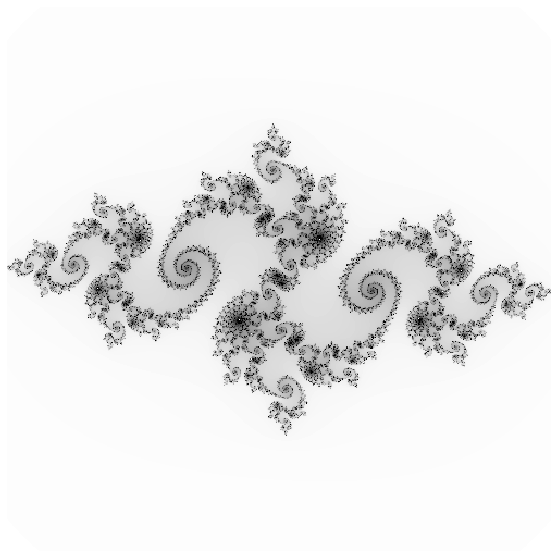

In [14]:
Julia = julia( a = -0.772691322542185, b = 0.124281466072787, n_max = 200)

Do you see what happens when you change the threshold value $n_{max}$? Try $n_{max} = 20$ for instance.

You can also try to get a better picture by setting width to 1000, but the computation time will be longer.

Now keep trying new values for $c$ (you can try some random numbers, or even your birthday date like: 0.MMJJYY+0.JJMMYY$i$) until fou find your favorite Julia set. Once you have found it, you can save it as a jpg picture using the command below!

In [6]:
plt.imsave('Julia.jpg', Julia, cmap='gray')

# Conclusion

Congratulation, you made it to the end of this notebook!

If you are sure to have understood everything, here are a few ideas to go deeper into fractal sets:

* As you may have noticed, Julia sets are self similar, which means you could zoom on the picture and still find the same patterns. You can try to add a "zoom" argument to the julia function and modify it in order to get a zoomed in image as an output.


* Julia sets are deeply connected to another famous fractal set, the Mandelbrot set. Unfortunately, we don't have enough time for Mandelbrot today but you can find how to draw the Mandelbrot set on the internet and get it by slightly modifying the previous julia function!


* Fractal sets look way better with colors, maybe you want to find an interesting way to picture them since grayscale is a bit dull, if so tell me about your ideas I'll help you to implement them into the julia function.